# Języki skryptowe - Python
## Wykład 8

---

* Błędy i wyjątki
* Operacje na plikach

## Błędy (*bug*)

---

> Without requirements or design, programming is the art of adding bugs to an empty text file.

> *Louis Srygley*

* błędy leksykalne i składniowe
* błędy typowania
* błędy semantyczne i logiczne
* błędy działania
* nieskończone obliczenia

## Błędy leksykalne

---

* pojedyncza jednostka leksykalna, której nie przewiduje definicja języka

In [1]:
x = 1
x++ # operator ++ nie istnieje

SyntaxError: invalid syntax (<ipython-input-1-c2b85b799f03>, line 2)

## Błędy składniowe (*syntax error*)

---

* niepoprawnie zestawione poprawne jednostki leksykalne 

In [2]:
if True                   # brakuje :
    print("Hello World")) # dodatkowy )

SyntaxError: invalid syntax (<ipython-input-2-3cc3ffe6806b>, line 1)

## Błędy typowania

---

* wyrażenie nieadekwatne do typu

In [3]:
x = 1

x[0] = 2 # x nie jest sekwencyjnym typem danych

TypeError: 'int' object does not support item assignment

## Błędy działania (*runtime error*)

---

* pojawiają się w trakcie działania programu (np. odczyt z pliku, który nie istnieje)

In [4]:
def iloraz(a, b):
    """Zwraca a / b"""
    return a / b

iloraz(10, 0) # dzielenie przez 0

ZeroDivisionError: division by zero

## Błędy semantyczne (*semantic error*)

---

* niezgodność oczekiwań ze stanem faktycznym

In [5]:
def dzialanie(a, b, c):
    """Zwraca iloraz a przez sumę b i c."""
    return a / b + c # zamiast a / (b + c)

## Błędy logiczne

---

* program liczy nie to co trzeba (w tym też błędy semantyczne)
* najtrudniejsze do znalezienia

In [6]:
def delta(a, b, c):
    """Liczy wyróżnik trójmianu kwadratowego."""
    return b - 4*a*c # zamiast b*b - 4*a*c

## Nieskończone pętle

---

In [7]:
def loop(i = 0):
    while i < 10:
        i -= 1 # i zawsze będzie mniejsze od 10

## Najdroższy myślnik w historii

---

* NASA (1962); Mariner 1:  Floryda -> Wenus

> Review Board determined that the omission of a hyphen in coded computer instructions in the data-editing program allowed transmission of incorrect guidance signals to the spacecraft.

[źródło](http://nssdc.gsfc.nasa.gov/nmc/spacecraftDisplay.do?id=MARIN1)

## Therac-25

---

* maszyna do radioterapii nowotworów
* na skutek błędów programistycznych kilka osób zmarło na skutek napromieniowania
* błąd typu *race condition* - przy zbyt szybkim wprowadzaniu danych (przez operatora) parametry zabiegu nie były prawidłowo inicjowane

## Zapobieganie błędom

---

* pisanie czytelnego kodu
* *code review*
* debugowanie

## Czytelność kodu

---

* zrozumiałe nazwy zmiennych (nawet kosztem długości)
* komentowanie kodu źródłowego, który nie jest zrozumiały od razu
* tworzenie dokumentacji w trakcie pisania programu
* opisywanie przyjętych założeń (w komentarzach i/lub dokumentacji)

## *Code review*

---

* sprawdzenie kodu przez inną osobę

![](src/code_review.jpg)

## Debugowanie

---

> If debugging is the process of removing software bugs, then programming must be the process of putting them in. 

> *Edsger Dijkstra*

* systematyczne redukowanie błędów w kodzie
* kontrolowane wykonanie programu
* debugger

## \_\_debug\_\_

---

In [8]:
%%writefile debug.py

# __debug__ - wbudowana stała
# równa True - jeśli uruchomione bez -O (optimize)

if __debug__:
    print("Jestem w trybie debugowania.")
else:
    print("Jestem w trybie normalnym.")

Overwriting debug.py


In [9]:
%%bash
python debug.py

Jestem w trybie debugowania.


In [10]:
%%bash
python -O debug.py

Jestem w trybie normalnym.


## Przykład

---

In [11]:
%%writefile fib.py
"""Wyznacza pierwsze wyrazy ciągu Fibonacciego."""

fib = [0, 1]

for i in range(10):
    if not __debug__:
        print("i =", i)
        print("fib =", fib)
        print("fib[i-2] =", fib[i-2])
        print("fib[i-1] =", fib[i-1])
        print()
    
    fib.append(fib[i-2] + fib[i-1])

print(fib) # [0, 1, 1, 2, 3, 5, 8, 13, ...]

Overwriting fib.py


In [12]:
%%bash
python fib.py

[0, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 5]


## Przykład - *debug mode*

---

In [13]:
%%bash
python -O fib.py

i = 0
fib = [0, 1]
fib[i-2] = 0
fib[i-1] = 1

i = 1
fib = [0, 1, 1]
fib[i-2] = 1
fib[i-1] = 0

i = 2
fib = [0, 1, 1, 1]
fib[i-2] = 0
fib[i-1] = 1

i = 3
fib = [0, 1, 1, 1, 1]
fib[i-2] = 1
fib[i-1] = 1

i = 4
fib = [0, 1, 1, 1, 1, 2]
fib[i-2] = 1
fib[i-1] = 1

i = 5
fib = [0, 1, 1, 1, 1, 2, 2]
fib[i-2] = 1
fib[i-1] = 1

i = 6
fib = [0, 1, 1, 1, 1, 2, 2, 2]
fib[i-2] = 1
fib[i-1] = 2

i = 7
fib = [0, 1, 1, 1, 1, 2, 2, 2, 3]
fib[i-2] = 2
fib[i-1] = 2

i = 8
fib = [0, 1, 1, 1, 1, 2, 2, 2, 3, 4]
fib[i-2] = 2
fib[i-1] = 2

i = 9
fib = [0, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4]
fib[i-2] = 2
fib[i-1] = 3

[0, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 5]


## Wbudowany debugger

---

In [14]:
%%writefile fib.py

import pdb # wbudowany debugger

pdb.set_trace() # zacznij debugować

fib = [0, 1]

for i in range(10):
    fib.append(fib[i-2] + fib[i-1])

print(fib) # [0, 1, 1, 2, 3, 5, 8, 13, ...]

Overwriting fib.py


## pdb

---

* *n* - następna instrukcja
* *s* - wejdź w funkcję
* *r* - wyjdź z funkcji
* *p* - wydrukuj zmienną
* *q* - przerwij
* *enter* - powtórz ostatnią komendę
* ...

## Wyjątki (*exceptions*)

---

* błędy działania (*runtime error*)
* wykryte podczas wykonywania są nazywane wyjątkami
* programista może decydować co robić z wyjątkami

## Przykład - iloraz

---

In [15]:
def iloraz(a, b):
    """Zwraca a / b"""
    return a / b

In [16]:
iloraz(10, 2)

5.0

In [17]:
iloraz(10, 0)

ZeroDivisionError: division by zero

## Iloraz - zabezpiecznie *if*

---

In [18]:
def iloraz(a, b):
    """Zwraca a / b lub zero, jeśli b = 0."""
    if b == 0: # można tak, ale lepiej korzystać z wyjątków
        return 0
    return a / b

In [19]:
iloraz(10, 2)

5.0

In [20]:
iloraz(10, 0)

0

## Iloraz - *wyjątek*

---

In [21]:
def iloraz(a, b):
    """Zwraca a / b lub zero, jeśli b = 0."""
    try:    # spróbuj
        return a / b
    except: # jeśli error to
        return 0

In [22]:
iloraz(10, 2)

5.0

In [23]:
iloraz(10, 0)

0

## Przykład - pobierz liczbę całkowitą

---

In [24]:
while True:
    try:    # spróbuj rzutować na int
        x = int(input("Podaj liczbę: "))
        break
    except: # jeśli się nie uda to
        print("Spróbuj jeszcze raz.")

Podaj liczbę: a
Spróbuj jeszcze raz.
Podaj liczbę: 1.0
Spróbuj jeszcze raz.
Podaj liczbę: 1


## Typy wyjątków

---

* pełna lista wbudowanych wyjątków [link](https://docs.python.org/3/library/exceptions.html#bltin-exceptions)

In [25]:
while True:
    try:
        x = int(input("Podaj liczbę: "))
        break
    except ValueError: # jeśli błąd wartości
        print("Spróbuj jeszcze raz.")

Podaj liczbę: a
Spróbuj jeszcze raz.
Podaj liczbę: 1.0
Spróbuj jeszcze raz.
Podaj liczbę: 1


## Komunikat wyjątku

---

In [26]:
while True:
    try:
        x = int(input("Podaj liczbę: "))
        break
    except ValueError as err: # err = komunikat błędu
        print("Spróbuj jeszcze raz, bo", err)

Podaj liczbę: a
Spróbuj jeszcze raz, bo invalid literal for int() with base 10: 'a'
Podaj liczbę: 1.0
Spróbuj jeszcze raz, bo invalid literal for int() with base 10: '1.0'
Podaj liczbę: 1


## Przykład

---

In [27]:
# więcej o plikach za chwilę

import sys

def read_data():
    try:
        plik = open('data.txt') # otwórz plik
        linia = plik.readline() # wczytaj linię
        dane = int(linia)       # rzutuj linię na int
    except IOError as err:      # IOError
        print("Błąd I/O:", err)
    except ValueError as err:   # ValueError
        print("Złe dane:", err)
    except:                     # InnyError
        print("Coś poszło nie tak...")
        sys.exit(0)

## Przykład - test

---

In [28]:
read_data()

Błąd I/O: [Errno 2] No such file or directory: 'data.txt'


In [29]:
%%writefile data.txt
Python

Writing data.txt


In [30]:
read_data()

Złe dane: invalid literal for int() with base 10: 'Python'


## *try...finally*

---

In [31]:
def iloraz(a, b):
    """Zwraca a / b."""
    try:
        return a / b
    finally: # wykonaj mimo zgłoszonego wyjątku
        print("Posprzątam bez względu na wyjątki.")

In [32]:
iloraz(10, 5)

Posprzątam bez względu na wyjątki.


2.0

In [33]:
iloraz(10, 0)

Posprzątam bez względu na wyjątki.


ZeroDivisionError: division by zero

## *try...except...finally*

---

In [34]:
def iloraz(a, b):
    """Zwraca a / b lub zero, jeśli b = 0."""
    try:
        return a / b
    except:
        print("Użytkownik nie zna matematyki.")
    finally: # wykona zawsze bez względu na wyni try
        print("Posprzątam bez względu na wyjątki.")

In [35]:
iloraz(10, 5)

Posprzątam bez względu na wyjątki.


2.0

In [36]:
iloraz(10, 0)

Użytkownik nie zna matematyki.
Posprzątam bez względu na wyjątki.


## Zgłaszanie wyjątków

---

In [37]:
def iloraz(a, b):
    """Zwraca a / b."""
    if b == 0:
        raise NameError("Dzielenie przez zero.")
    return a / b

In [38]:
iloraz(10, 5)

2.0

In [39]:
iloraz(10, 0)

NameError: Dzielenie przez zero.

## Zgłaszanie wyjątków test

---

In [40]:
try:
    iloraz(10, 0)
except NameError as err:
    print("Błąd:", err)

Błąd: Dzielenie przez zero.


## Własne wyjątki

---

* możliwe jest definiowanie własnych wyjątków
* o tym w przyszłości, jak już poznamy klasy

## *assert*

---

```py
# assert expression jest równoważne
if __debug__:
    if not expression: raise AssertionError
```

In [41]:
%%writefile assert.py

import sys

assert sys.argv[1] != "Python"

print("Assert test.")

Overwriting assert.py


## *assert* - test

---

In [42]:
%%bash
python assert.py 1

Assert test.


In [43]:
%%bash
python assert.py Python

Traceback (most recent call last):
  File "assert.py", line 4, in <module>
    assert sys.argv[1] != "Python"
AssertionError


In [44]:
%%bash
python -O assert.py Python

Assert test.


## Operacje na plikach

---

* do otwierania plików służy funkcja wbudowana *open*
* przyjmuje wiele argumentów, przy czym dwa najważniejsze to: *file* i *mode*

```py
open(file, mode)
```

* *file* - nazwa pliku (lub pełna ścieżka, jeśli nie w katalogu roboczym)
* *mode* - tryb

## Tryby pracy nad plikiem

---

| Tryb | Opis                                                 |
|:----:|:----------------------------------------------------:|
| r    | tylko do oczytu (domyślnie)                          |
| w    | tylko do zapisu (istniejący plik zostanie nadpisany) |
| x    | tylko do zapisu (plik nie może istnieć)              |
| a    | tylko do zapisu (od końca pliku)                     |
| +    | aktualizowanie pliku (odczyt i zapis)                |
| t    | tryb tekstowy (domyślnie)                            |
| b    | tryb binarny                                         |

* np. `open(file, r+b)` otwiera plik do odczytu, z możliwością zapisu, w trybie binarnym

## Zapis do pliku

---

In [45]:
# otwórz plik do zapisu
# usuń zawartość jeśli plik istnieje
file = open("test", 'w')

file.write("0123456789") # zapisz do pliku

file.close() # zamknij plik

In [46]:
file.write("jeszcze coś") # plik już jest zamknięty

ValueError: I/O operation on closed file.

## Dopisywanie do pliku

---

In [47]:
# otwórz plik do zapisu
# ustaw się na końcu pliku
file = open("test", 'a')

file.write("abcdefghij") # zapisz do pliku

file.close() # zamknij plik

## Odczyt pliku

---

In [48]:
file = open("test", "r") # otwórz tylko do odczytu

zawartosc = file.read() # wczytaj całą zawartość pliku

file.close()

print(zawartosc)

0123456789abcdefghij


## *r+* vs *a*

---

In [49]:
# a (append) - zaczyna dopisywać na koniec pliku
# r+ - zaczyna zapisywać od początku (nadpisując dane)

file = open("test", "r+") # odczyt z możliwością zapisu

file.write("." * 5) # zapisz 5 kropek

file.close()

In [50]:
%%bash
cat test

.....56789abcdefghij

## *w+* vs *r+*

---

In [51]:
# r+ - zaczyna zapisywać od początku (nadpisując dane)
# w+ - najpierw czyści plik (jeśli istnieje)

file = open("test", "w+") # zapis z możliwością odczytu

file.write("." * 5) # zapisz 5 kropek

file.close()

In [52]:
%%bash
cat test

.....

## *w* vs *w+*

---

In [53]:
file = open("test", "w") # tylko zapis

file.write("." * 5) # zapisz 5 kropek

zawartosc = file.read()

file.close()

print(zawartosc)

UnsupportedOperation: not readable

## *w* vs *w+*

---

In [54]:
file = open("test", "w+") # zapis z możliwościa odczytu

file.write("." * 5) # zapisz 5 kropek

zawartosc = file.read()

file.close()

print(zawartosc) # nie wydrukuje bo jesteśmy na końcu pliku

## *seek*

---

In [55]:
file = open("test", "w+") # zapis z możliwościa odczytu

file.write("." * 5) # zapisz 5 kropek

file.seek(0) # ustaw położenie

zawartosc = file.read()

file.close()

print(zawartosc) # nie wydrukuje bo jesteśmy na końcu pliku

.....


## *tell*

---

In [56]:
%%bash
cat test

.....

In [57]:
file = open("test", "a+") # dodawanie z możliwością odczytu

file.tell() # pozycja w pliku

5

In [58]:
file.write("12345") # dopisz 12345

file.tell()

10

In [59]:
%%bash
cat test

.....12345

## *seek* and *read*

---

In [60]:
%%bash
cat test

.....12345

In [61]:
# seek(offset, punkt_odniesienia)
# po = 0, 1, 2 (początek pliku, bieżąca pozycja, koniec pliku)
# w trybie tekstowym tylko 0 jest dozwolone

file.seek(6, 0) # o 6 znaków od początku 

file.read(1)

'2'

In [62]:
file.tell() # read(n) przesuwa o n

7

## Uwaga

---

* wygodnie jest wczytać cały plik do pamięci
    * *read()* - zawartość jako pojedynczy string
    * *readlines()* - zawartość jako lista (linia -> element)
* jednak w przypadku dużych plików może to byś katastrofalne, wtedy lepiej
    * *read(n)* - wczytaj *n* bajtów
    * *readline()* - wczytaj linię

## Otwieranie plików a wyjątki

---

```py
try:
    file = open("złe_dane")
    data = file.read() # zgłasza wyjątek
finally: # porządek nawet w przypadku wyjątku
    print("Czyszczę śmieci.")
    file.close()
```

## *with* statement

---

* gwarantuje, że jeśli wywołane zostało `__enter__()` (np. otwarcie pliku)
* to zostanie wywołane `__exit()__` (np. zamknięcie pliku)
* nawet jeśli po drodze wystąpi wyjątek 

## *with open*

---

```py
with open("plik_z_danymi") as file:
    data = file.read()
```

* gwarantuje, że plik zostanie zawsze poprawnie zamknięty
* wygodniejsze niż *try...finally...*

## Comma-separated values (CSV)

---

* forma przechowywania danych w plikach tesktowych
* każde pole oddzielone jest przecinkiem
* plik csv

```
imię, nazwisko, ocena
Kasia, Kowalska, 4
Jan, Nowak, 4
```

* tabela

| imię  | nazwisko | ocena |
|:-----:|:--------:|:-----:|
| Kasia | Kowalska | 4     |
| Jan   | Nowak    | 4     |

## Moduł *csv*

---

In [63]:
import csv

data = [["imie", "nazwisko", "ocena"],
        ["Kasia", "Kowalska", 4],
        ["Jan", "Nowak", 4]]

with open("oceny.csv", "w") as csvfile:
    writer = csv.writer(csvfile) # tworzymy "pisarza" csv
    for wpis in data:
        writer.writerow(wpis)    

In [64]:
%%bash
cat oceny.csv

imie,nazwisko,ocena
Kasia,Kowalska,4
Jan,Nowak,4


## Wczytywanie danych

---

In [65]:
import csv

with open('oceny.csv', 'r') as csvfile:
    reader = csv.reader(csvfile) # tworzymy "czytelnika" csv
    for wpis in reader:
        print(wpis)

['imie', 'nazwisko', 'ocena']
['Kasia', 'Kowalska', '4']
['Jan', 'Nowak', '4']


## Przykład - ankieta

---

In [66]:
%%bash
cat ankieta.csv | sed -n 1p # pierwsza linia

Sygnatura czasowa,"Co sądzisz o ""przemycaniu"" na wykładzie podstawowych pojęć z innych dziedzin informatyki?",Tempo wykładu jest,Czy na wykładzie powinno być więcej przykładów?,"Ostatnie wykłady (jeśli starczy czasu, po przerobieniu całego podstawowego materiału) powinny być poświęcone"


In [67]:
%%bash
cat ankieta.csv | sed -n 2p # druga linia

2016-11-04 09:38:13,"Jak najbardziej, o ile nie będzie tego na egzaminie.",Zbyt szybkie! Nie nadążam z przyswajaniem nowych pojęć.,"Raczej tak, przykłady trochę ułatwiają przyswojenie nowych pojęć.",Powtórce. Przegląd wszystkich omawianych wcześniej zagadnień.


## Ankieta - wczytywanie danych

---

In [68]:
import csv

# wczytaj wyniki ankiety do zmiennej wyniki
with open('ankieta.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    wyniki = list(reader) # zapisz wyniki

In [69]:
headers = wyniki.pop(0) # pierwszy wiersz to pytania

print(headers)

['Sygnatura czasowa', 'Co sądzisz o "przemycaniu" na wykładzie podstawowych pojęć z innych dziedzin informatyki?', 'Tempo wykładu jest', 'Czy na wykładzie powinno być więcej przykładów?', 'Ostatnie wykłady (jeśli starczy czasu, po przerobieniu całego podstawowego materiału) powinny być poświęcone']


In [70]:
print(wyniki[0]) # odpowiedzi pierwszej osoby

['2016-11-04 09:38:13', 'Jak najbardziej, o ile nie będzie tego na egzaminie.', 'Zbyt szybkie! Nie nadążam z przyswajaniem nowych pojęć.', 'Raczej tak, przykłady trochę ułatwiają przyswojenie nowych pojęć.', 'Powtórce. Przegląd wszystkich omawianych wcześniej zagadnień.']


## Ilość odpowiedzi 

---

In [71]:
n_votes = len(wyniki)

print("W ankiecie wzięło {} osób.".format(n_votes))

W ankiecie wzięło 22 osób.


## Sygnatura czasowa

---

In [72]:
from datetime import datetime

def str2date(date):
    """Konwertuje string do datetime wg formatu z ankiety."""
    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

sygnatury = []

for glos in wyniki:
    sygnatury.append(str2date(glos[0]))

In [73]:
print("Między pierwszym a ostatnim głosem minęło:",
      sygnatury[-1] - sygnatury[0])

Między pierwszym a ostatnim głosem minęło: 11 days, 15:37:12


## Liczba głosów w czasie

---

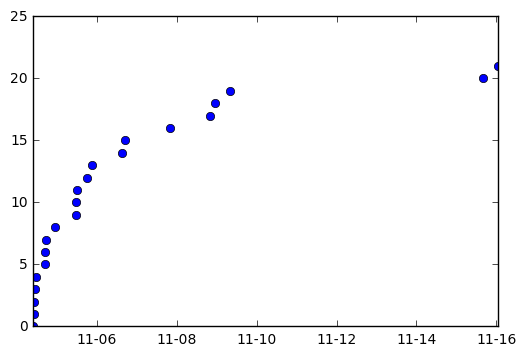

In [75]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

dates = matplotlib.dates.date2num(sygnatury)

fig, ax = plt.subplots()
ax.plot_date(dates, range(n_votes))

ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))

## Zliczanie głosów

---

In [76]:
def count_votes(odpowiedzi):
    """Liczy ilość głosów per odpowiedź."""
    results = {} # odpowiedź: liczba głosów
    
    while len(odpowiedzi): # dopóki pozostały odpowiedzi
        odpowiedz = odpowiedzi[0] # weź pierwszą z brzegu
        n_votes = odpowiedzi.count(odpowiedz) # liczba wystąpień
        results[odpowiedz] = n_votes # zapisz
        # usuń wszystkie wystąpienia odpowiedz
        odpowiedzi = [o for o in odpowiedzi if o != odpowiedz]
    
    return results

## Analiza pytania

---

In [77]:
def analizuj(n, m=3):
    """Drukuje m najczęstszych odpowiedzi na n-te pytanie."""
    pytanie = headers[n] # treść pytania
    odpowiedzi = [o[n] for o in wyniki] # n-ta kolumna
    
    votes = count_votes(odpowiedzi) # {odp: liczba głosów}
    # posortuj głosy -> odpowiedzi od najczęstszych
    best = sorted(votes, key=votes.get, reverse=True)
    
    # wyrdukuj pytanie
    print("-"*len(pytanie))
    print(pytanie)
    print("-"*len(pytanie), end="\n\n")
    
    # wydrukuj m najczęstszych odpowiedzi
    for i in range(m):
        odp = best[i] # i-ta odpowiedz
        procent = votes[odp] / n_votes * 100 # procent głosów
        print("{:.2f}% -> {}".format(procent, odp))

## Pytanie 1

---

In [78]:
analizuj(1)

-----------------------------------------------------------------------------------------
Co sądzisz o "przemycaniu" na wykładzie podstawowych pojęć z innych dziedzin informatyki?
-----------------------------------------------------------------------------------------

40.91% -> Jak najbardziej! Wszystko związane z programowaniem jest mile widziane.
36.36% -> Jak najbardziej, o ile nie będzie tego na egzaminie.
13.64% -> Chętnie poznam, ale nie za dużo.


## Pytanie 2

---

In [79]:
analizuj(2)

------------------
Tempo wykładu jest
------------------

40.91% -> Trochę za szybkie. Można minimalnie zmniejszyć liczbę nowych pojęć per wykład.
22.73% -> Zbyt szybkie! Nie nadążam z przyswajaniem nowych pojęć.
22.73% -> Idealne.


## Pytanie 3

---

In [80]:
analizuj(3)

-----------------------------------------------
Czy na wykładzie powinno być więcej przykładów?
-----------------------------------------------

45.45% -> Raczej tak, przykłady trochę ułatwiają przyswojenie nowych pojęć.
36.36% -> Jest dobrze jak jest.
9.09% -> Zdecydowanie tak! Nic tak nie uczy jak dobry przykład.


## Pytanie 4

---

In [82]:
analizuj(4, 4)

------------------------------------------------------------------------------------------------------------
Ostatnie wykłady (jeśli starczy czasu, po przerobieniu całego podstawowego materiału) powinny być poświęcone
------------------------------------------------------------------------------------------------------------

40.91% -> Powtórce. Przegląd wszystkich omawianych wcześniej zagadnień.
22.73% -> GUI. Graficzny interfejs użytkownika.
18.18% -> Tworzenie gier.
13.64% -> Bazy danych.
